In [1]:
import sys
import logging

logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger(__name__)

def add_path(newPath:str) -> str:
    """
    Adds newPath to the existing sys path, if needed.
    :param newPath: gets added temporarily to the PYTHONPATH.
    :return: updated string
    """
    if newPath in sys.path:
        logger.warning(f'path: {newPath} is already on sys.path. (No action taken.)')
        return sys.path
    else:
        logger.debug(f'Adding new path: {newPath} to sys.path.')
        sys.path.append(newPath)
    return sys.path

add_path(r'C:\Users\Owner\PycharmProjects\Utilities')

DEBUG:__main__:Adding new path: C:\Users\Owner\PycharmProjects\Utilities to sys.path.


['C:\\Users\\Owner\\PycharmProjects\\DataScience',
 'C:\\Users\\Owner\\Anaconda3\\python37.zip',
 'C:\\Users\\Owner\\Anaconda3\\DLLs',
 'C:\\Users\\Owner\\Anaconda3\\lib',
 'C:\\Users\\Owner\\Anaconda3',
 '',
 'C:\\Users\\Owner\\AppData\\Roaming\\Python\\Python37\\site-packages',
 'C:\\Users\\Owner\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\Owner\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\Owner\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Owner\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Owner\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Owner\\.ipython',
 'C:\\Users\\Owner\\PycharmProjects\\Utilities']

# Decision tree
# Step 1. Import data

In [2]:
# Import Cancer data from the Sklearn library
from PandasUtil import PandasUtil
pu = PandasUtil()
df = pu.read_df_from_csv(csv_file_name=r'C:\Users\Owner\Documents\Udemy\ML-Classification-Package\ML Classification Package\6. Decision Trees and Random Forest\amazon_alexa.tsv', separator='\t')
pu.get_rowCount_colCount(df)
df.tail()

DEBUG:matplotlib:$HOME=C:\Users\Owner
DEBUG:matplotlib:CONFIGDIR=C:\Users\Owner\.matplotlib
DEBUG:matplotlib:matplotlib data path: C:\Users\Owner\Anaconda3\lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:loaded rc file C:\Users\Owner\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
DEBUG:matplotlib:matplotlib version 3.0.2
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32
DEBUG:matplotlib:loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'nt', 'winreg', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'encodings.cp1252', 'site', 'os', 'stat', '_stat', 'ntpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'types', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importl

DEBUG:matplotlib:CACHEDIR=C:\Users\Owner\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\Owner\.matplotlib\fontlist-v300.json
DEBUG:PandasUtil:df has 3150 rows and 5 columns.


,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [6]:
# Don't need the date.
pu.drop_col(df, 'date', is_in_place=True)
df.tail()

,rating,variation,verified_reviews,feedback
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,Black Dot,"Listening to music, searching locations, check...",1
3147,5,Black Dot,"I do love these things, i have them running my...",1
3148,5,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,Black Dot,Good,1


# Visualize the data

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


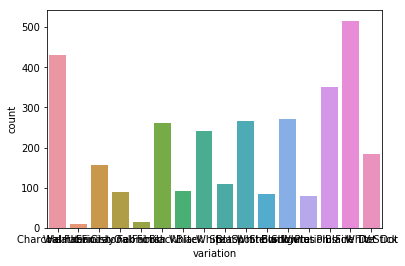

In [7]:
from PlotUtil import PlotUtil
pltu = PlotUtil()
pltu.count_plot(df, 'variation', return_function_do_not_plot=False)


In [8]:
pos_mask = pu.mark_rows_by_criterion(df, 'feedback', 1)
pos_df = pu.masked_df(df, pos_mask)
neg_df = pu.masked_df(df, pos_mask, invert_mask=True)
neg_df.head()

,rating,variation,verified_reviews,feedback
46,2,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,Charcoal Fabric,Not much features.,0
162,1,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,Heather Gray Fabric,Sad joke. Worthless.,0


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


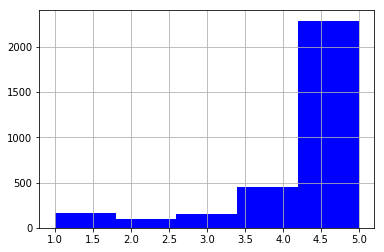

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


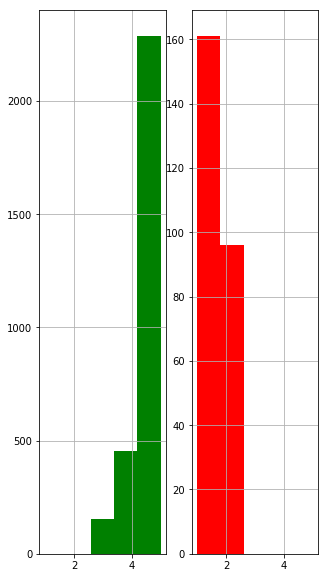

In [9]:
from matplotlib import pyplot as plt

pltu.histogram_plot(df, 'rating', bins=5, color='b', return_function_do_not_plot=False)
plt.figure(figsize=(5, 10))
plt.subplot(1, 2, 1)
pltu.histogram_plot(pos_df, 'rating', bins=5, color='g', range=(1,5), return_function_do_not_plot=True)
plt.subplot(1, 2, 2)
pltu.histogram_plot(neg_df, 'rating', bins=5, color='r', range=(1,5), return_function_do_not_plot=True)
plt.show()


# Feature Engineering

In [10]:
# get one-hot for variation
df_dummies = pu.dummy_var_df(df=df, columns='variation')
df_dummies.head()

,rating,verified_reviews,feedback,variation_Black Dot,variation_Black Plus,variation_Black Show,variation_Black Spot,variation_Charcoal Fabric,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,variation_Walnut Finish,variation_White,variation_White Dot,variation_White Plus,variation_White Show,variation_White Spot
0,5,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,5,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,4,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,5,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# Fit the data
## First, define X and y

In [ ]:
from PandasUtil import PandasUtil
pu = PandasUtil()

target_col = 'target'
X = pu.drop_col(df, target_col, False).values

logger.debug(f'df without target col: {X[-2:]}')
y = df[target_col].values
logger.debug(f'target column: {y[-2:]}')

## Scale the data

In [ ]:
from DataScienceUtil import DataScienceUtil
X = DataScienceUtil.scale(X=X, f_scaler=None) # Normalize the data!
logger.debug(f'scaled X: {X[-2:]}')

## On to the test data

In [ ]:
# from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from PlotUtil import PlotUtil

pltu = PlotUtil()

X_train, X_test, y_train, y_test = DataScienceUtil.train_test_split(X, y, test_frac=0.35, seed=10)
logger.debug(f'X_train and X_test shapes are {X_train.shape} and {X_test.shape}')
logger.debug(f'y_train and y_test shapes are {y_train.shape} and {y_test.shape}')
logger.debug(f'beginning of y_test (test data) is:   {y_test[:20]}')
classifier = DataScienceUtil.train_model(X_train, y_train, f_classifier=SVC, seed=0)
logger.debug(f'classifier type is: {type(classifier)}')
y_predict = DataScienceUtil.model_predict(classifier, X_test)
logger.debug(f'beginning of y_predict (predicted) is: {y_predict[:20]}')

pltu.confusion_matrix_test_vs_predict(y_test, y_predict)

report = DataScienceUtil.classification_report(y_test, y_predict)
logger.info(f'\n{report}')

In [ ]:
# from sklearn.svm import SVC
dsu = DataScienceUtil()
param_grid = dsu.build_param_grid()
grid = dsu.grid_search_and_fit(X=X_test, y=y_test, classifier=SVC(), is_refit=True, verbose_level=4)
grid_predict = dsu.grid_predict(X=X_test)

pltu.confusion_matrix_test_vs_predict(y_test, grid_predict)

report = DataScienceUtil.classification_report(y_test, grid_predict)
logger.info(f'\n{report}')

In [ ]:
PlotUtil.visualize_results(X_set=X_test, y_set=y_test, classifier=classifier, title="Facebook ad", x_label="Time", y_label="Salary")